In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#importing and reading data sets
Big_Mart = pd.read_csv("Train.csv")

In [3]:
Big_Mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Big_Mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
Big_Mart.shape

(8523, 12)

# First look for the dataset

# 1

In [6]:
# looking for the missing values 
Big_Mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 2

In [7]:
Big_Mart.Item_Identifier.nunique()

1559

In [8]:
Big_Mart.Item_Identifier.value_counts()

FDG33    10
FDW13    10
DRN47     9
FDU12     9
FDO19     9
         ..
FDN52     1
FDQ60     1
FDE52     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64

# 3

In [9]:
Big_Mart.Outlet_Identifier.nunique()

10

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

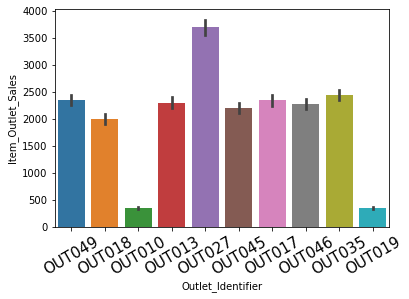

In [10]:
ax = sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=Big_Mart)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=30)

# 4

<AxesSubplot:ylabel='Item_Outlet_Sales'>

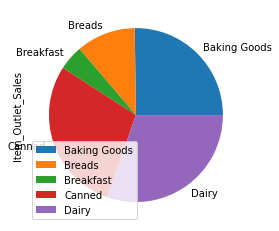

In [11]:
Big_Mart.groupby(['Item_Type']).sum()[:5].plot(kind='pie', y='Item_Outlet_Sales')

# 5

In [12]:
Big_Mart1 = Big_Mart.copy()

In [13]:
def Visibility(x):
    valu = 'big than 0.2 ' if (x['Item_Visibility']> 0.2 ) else'less than 0.2'
    return valu

In [14]:
Big_Mart1['Visibility']= Big_Mart.apply(Visibility, axis=1)

<AxesSubplot:ylabel='Item_Outlet_Sales'>

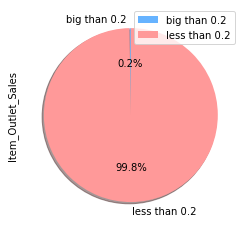

In [15]:
Big_Mart1.groupby(['Visibility']).sum().plot(kind='pie',y='Item_Outlet_Sales',
colors = ['#66b3ff','#ff9999'],autopct='%1.1f%%',shadow=True, startangle=90)

In [16]:
Big_Mart1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,less than 0.2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,less than 0.2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,less than 0.2
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,less than 0.2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,less than 0.2


# 6

In [17]:
Big_Mart2 = Big_Mart.copy()

<AxesSubplot:>

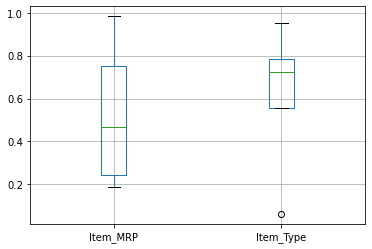

In [18]:
Big_Mart2 = pd.DataFrame(data = np.random.random(size=(4,2)), columns = ['Item_MRP','Item_Type'])
Big_Mart2.boxplot()

# Cleaning the dataset

# 1 fill in the missing value in Item_Weight with the mean

In [19]:
Big_Mart.Item_Weight = Big_Mart.Item_Weight.fillna(Big_Mart.Item_Weight.mean())

In [20]:
Big_Mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 2 fill in the missing value in Outlet_Size with new class

In [21]:
Big_Mart['Outlet_Size'] = Big_Mart['Outlet_Size'].fillna('global constant')

In [22]:
Big_Mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 3 fill in the 0 value in item_visibility with the median or the mean  

In [23]:
Big_Mart.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [24]:
Big_Mart.Item_Visibility.median()

0.05393093400000001

In [25]:
Big_Mart['Item_Visibility'] = Big_Mart['Item_Visibility'].map( lambda x : Big_Mart.Item_Visibility.median()
if x == 0.0 else x)

In [26]:
Big_Mart.Item_Visibility.value_counts()

0.053931    527
0.076975      3
0.080640      2
0.093308      2
0.076792      2
           ... 
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.037218      1
Name: Item_Visibility, Length: 7879, dtype: int64

In [27]:
Big_Mart.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,global constant,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.053931,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,global constant,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,global constant,Tier 2,Supermarket Type1,4710.5350


# Convert inconsistent values in (Item_Fat_Content) from “LF” to “Low Fat”  

In [28]:
Big_Mart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
Big_Mart.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
Big_Mart.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)


In [30]:
Big_Mart.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# convert to binary attribute with the value 1 for Regular  and 0 for Low Fat 

In [31]:
Big_Mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,global constant,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
cleanup_nums = {"Item_Fat_Content":     {"Low Fat": 0 , "Regular": 1},}

In [33]:
Big_Mart = Big_Mart.replace(cleanup_nums)

In [34]:
Big_Mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,global constant,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# drop identifier columns.

In [35]:
Big_Mart3 = Big_Mart.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
Big_Mart3

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,0,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,1,0.053931,Fruits and Vegetables,182.0950,1998,global constant,Tier 3,Grocery Store,732.3800
4,8.930,0,0.053931,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,1,0.046982,Baking Goods,108.1570,2002,global constant,Tier 2,Supermarket Type1,549.2850
8520,10.600,0,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Linear regression 

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
strings = (Big_Mart3.dtypes == 'object')
change_columns = list(strings[strings].index)

In [38]:
for col in change_columns:
    Big_Mart3[col] = encoder.fit_transform(Big_Mart3[col])

In [39]:
X = Big_Mart3.drop('Item_Outlet_Sales', axis = 1)
y = Big_Mart3['Item_Outlet_Sales']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

In [41]:
X_train.shape

(5710, 9)

In [42]:
y_train.shape

(5710,)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_test, y_test)

LinearRegression()

In [46]:
predict_y = model.predict(X_train)

In [47]:
X_train=np.arange(0,len(X_train),1)

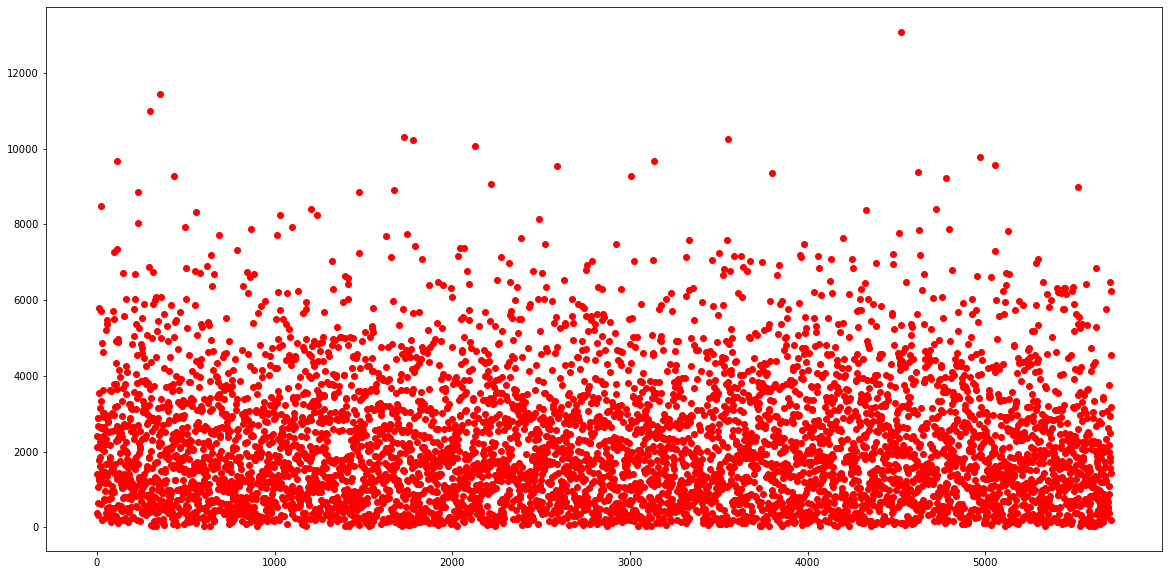

In [48]:
plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, color = 'red')

# mean squared error

In [49]:

MSE= metrics.mean_squared_error(y_train, predict_y)

print("mean squared error:",MSE)


mean squared error: 1450991.033185653


# correlation matrix

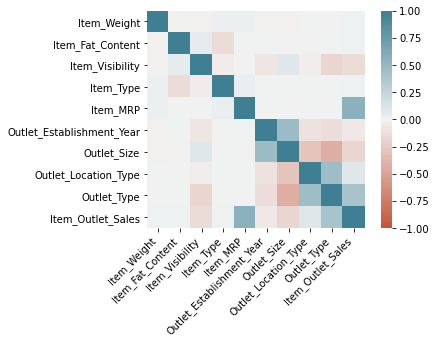

In [50]:
corr = Big_Mart3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);